In [5]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np
from numpy import linalg 

from numpy.random import randint
from scipy.stats import chisquare
from scipy.stats.contingency import expected_freq
from itertools import product
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score, accuracy_score

%config IPCompleter.greedy=True

from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier'''

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import train_test_split\n\nfrom statsmodels.graphics.mosaicplot import mosaic\nfrom itertools import product\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\nfrom scipy.stats import chi2_contingency\nimport matplotlib.patches as mpatches\nimport numpy as np\nfrom numpy import linalg \n\nfrom numpy.random import randint\nfrom scipy.stats import chisquare\nfrom scipy.stats.contingency import expected_freq\nfrom itertools import product\nfrom statsmodels.graphics.mosaicplot import mosaic\nfrom sklearn import datasets\nfrom scipy.cluster.hierarchy import linkage, fcluster, dendrogram\n\nfrom sklearn.model_selection import GridSearchCV, RandomizedSearchCV\nfrom sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score, accuracy_score\n\n%config IPCompleter.greedy=True\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn import tree\nfrom sk

In [6]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [7]:
df = pd.read_csv(r'C:\Audiobooks\ForDS\telecom_churn.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

# 3. Multivariate visualization

## 3.1 Quantitative vs. Quantitative

### Correlation matrix

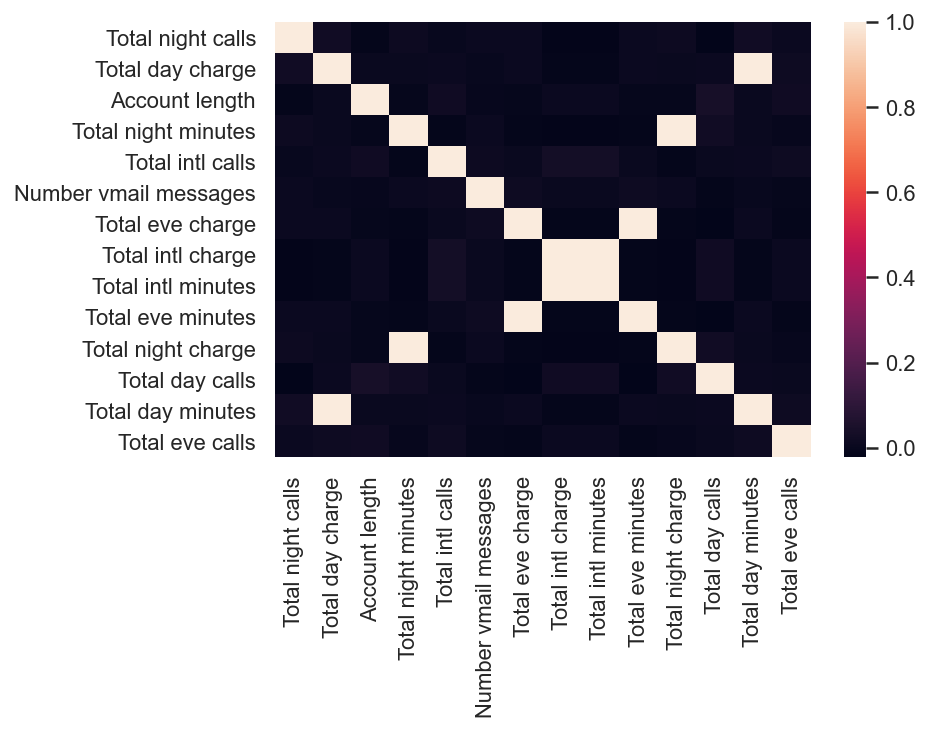

In [9]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);



From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:


In [11]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

 ### Scatter plot

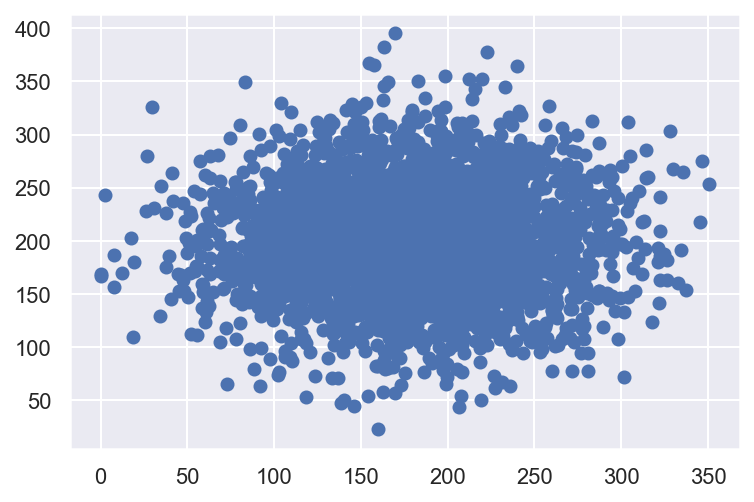

In [12]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

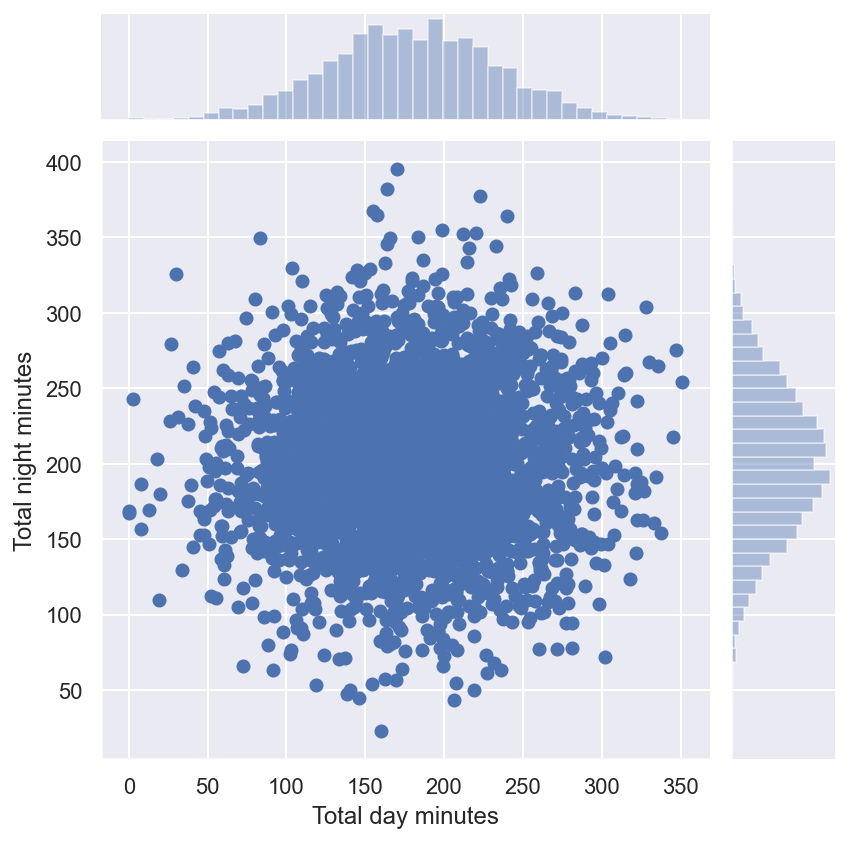

In [13]:


sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');



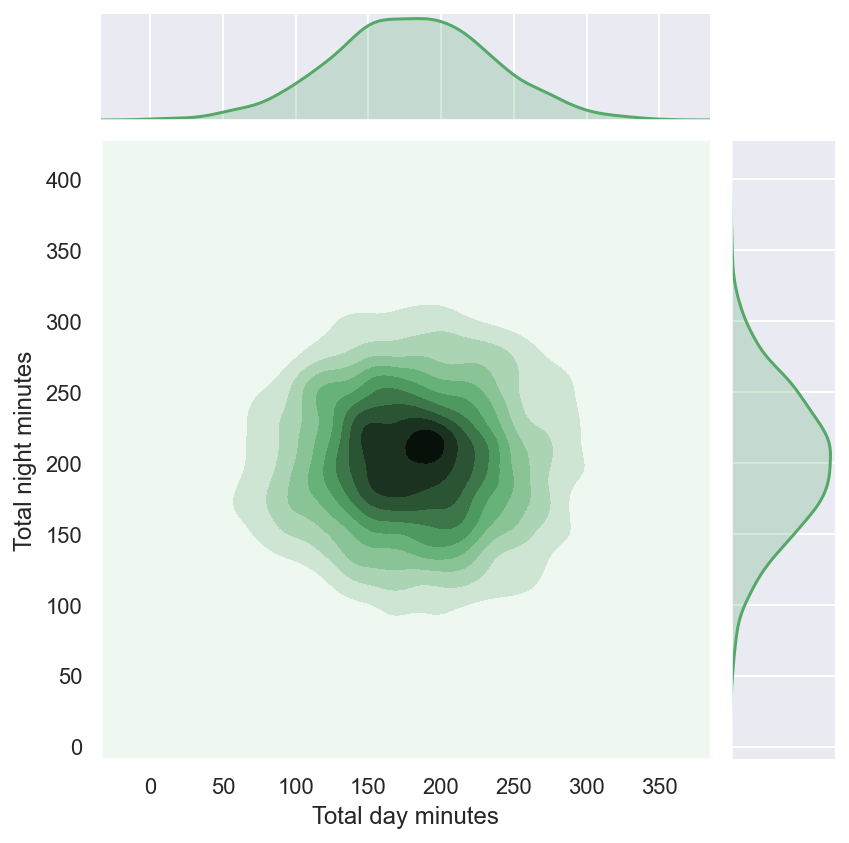

In [14]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

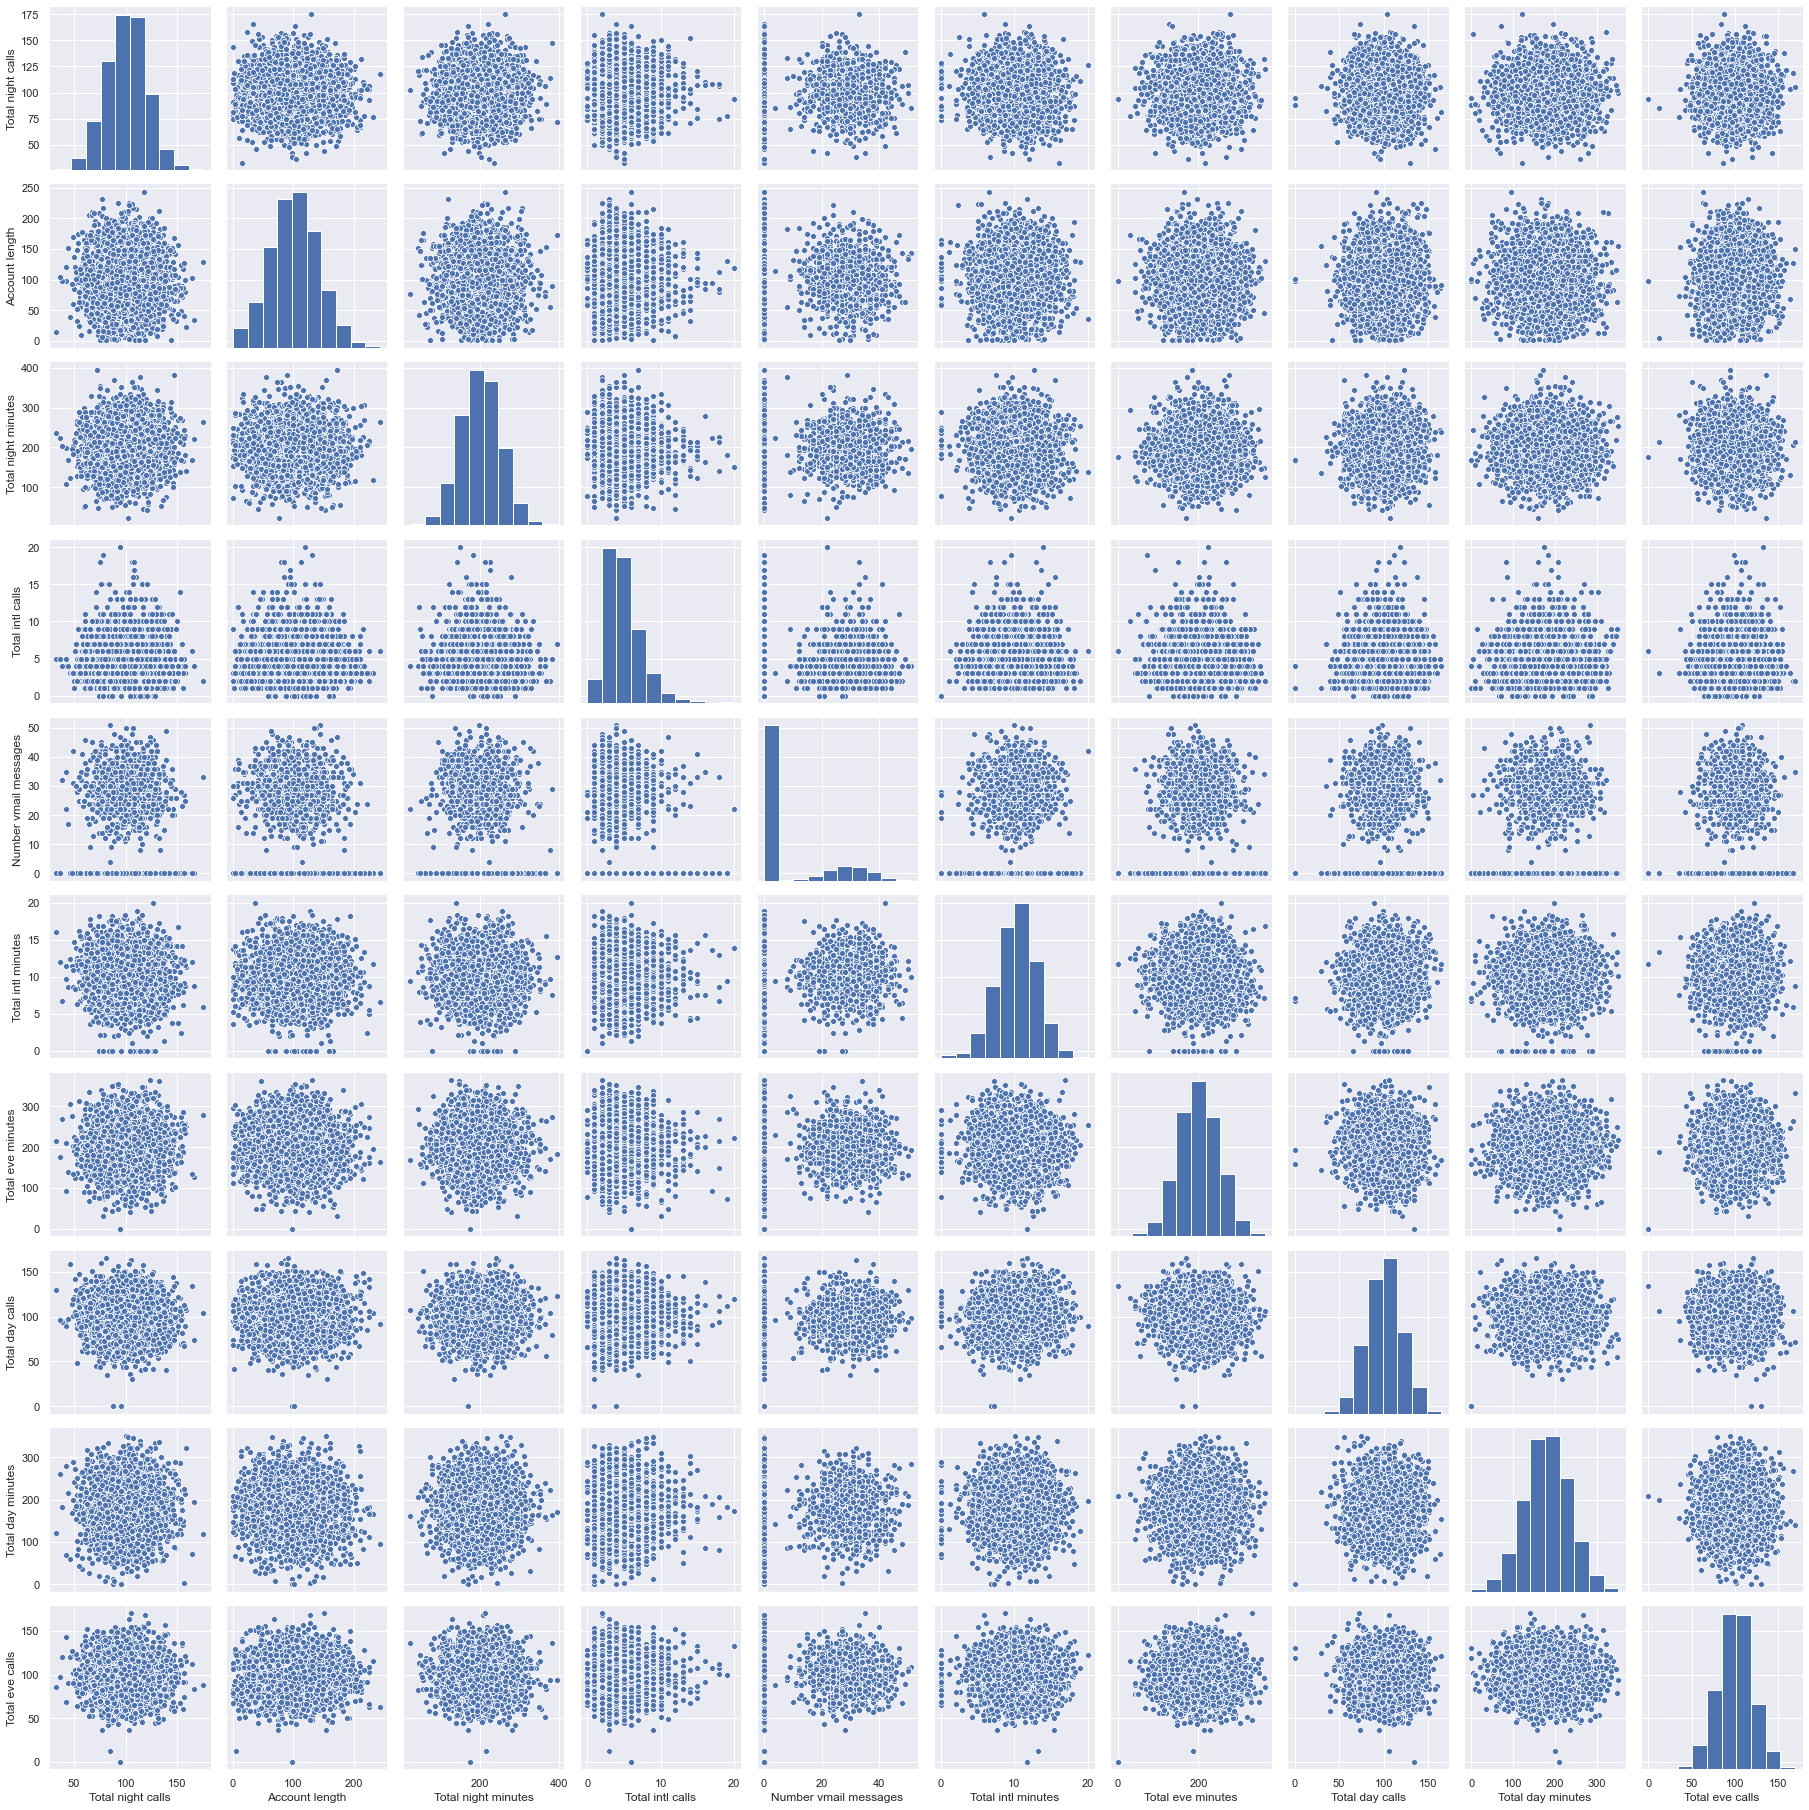

In [15]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [16]:
%config InlineBackend.figure_format = 'retina'

## 3.2 Quantitative vs. Categorical

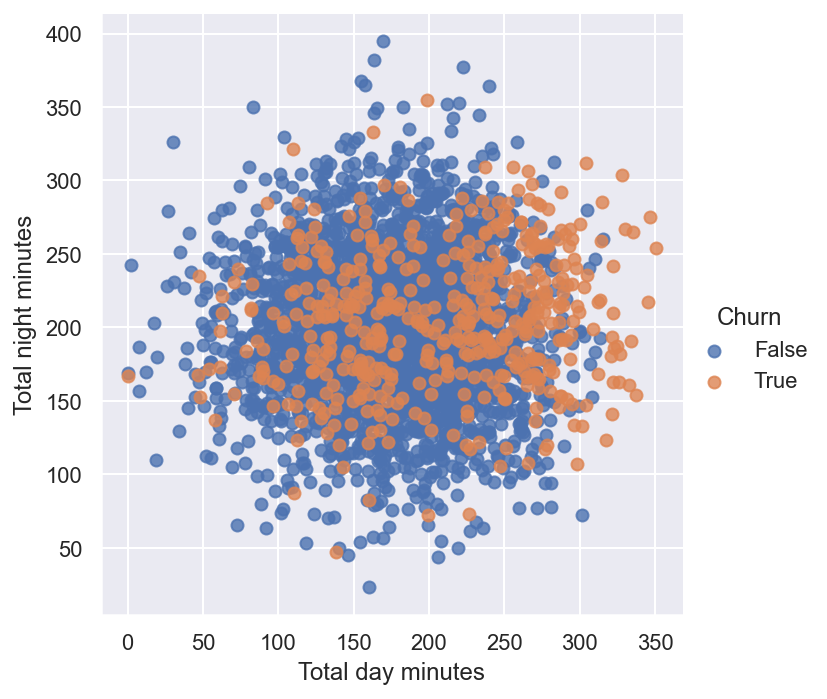

In [17]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);


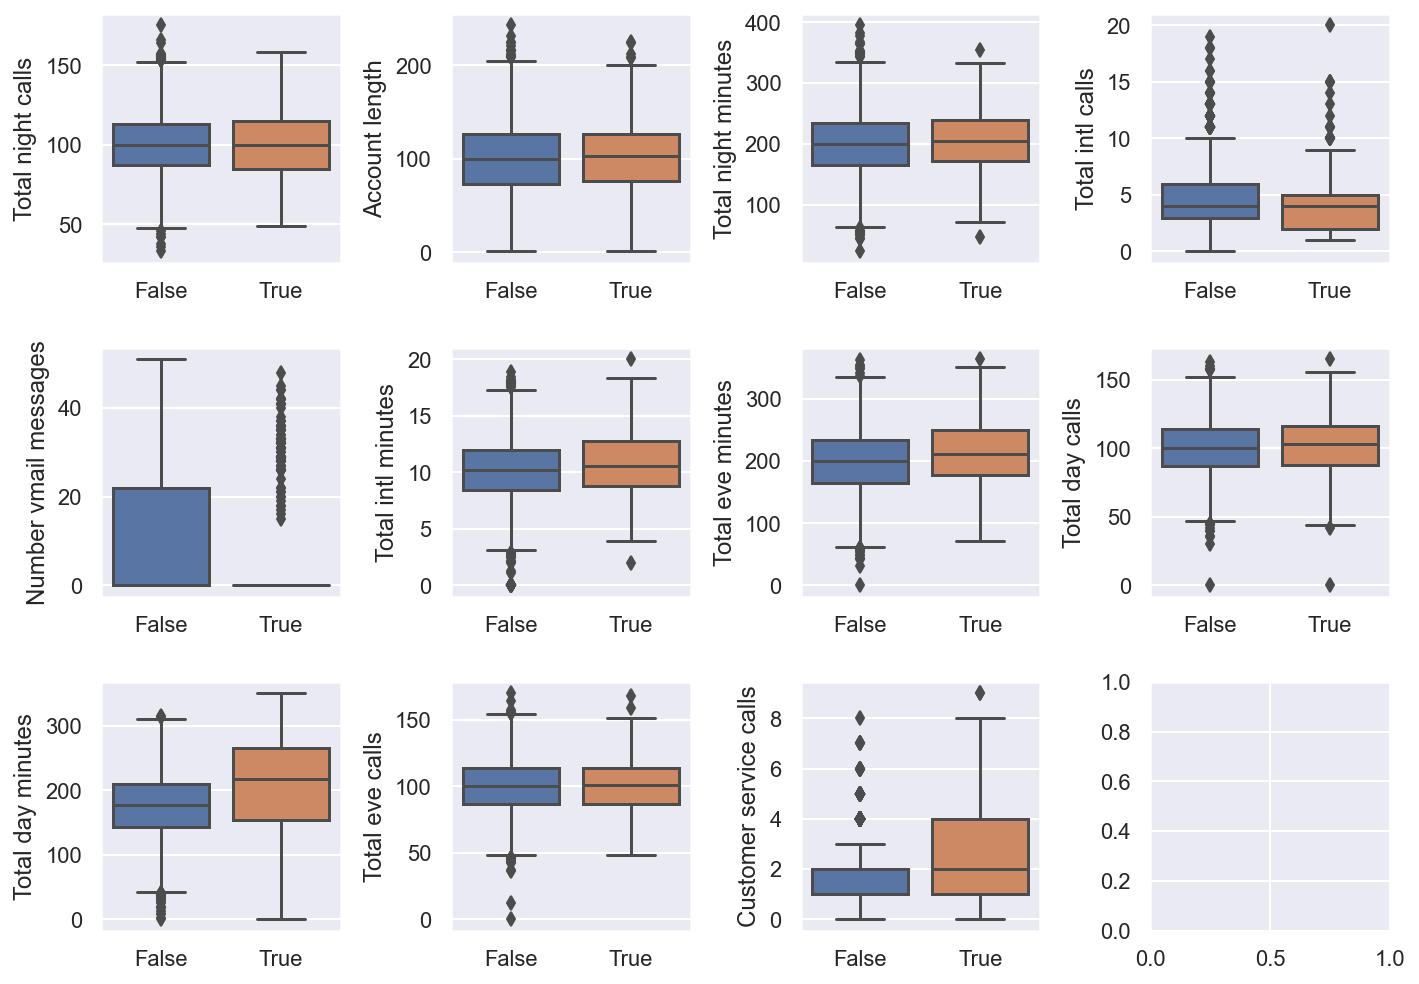

In [27]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

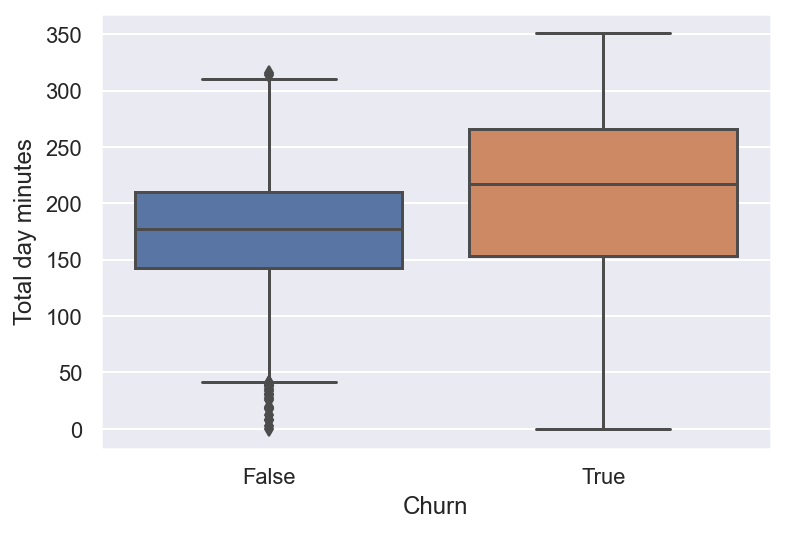

In [28]:

sns.boxplot(x='Churn', y='Total day minutes', data=df);

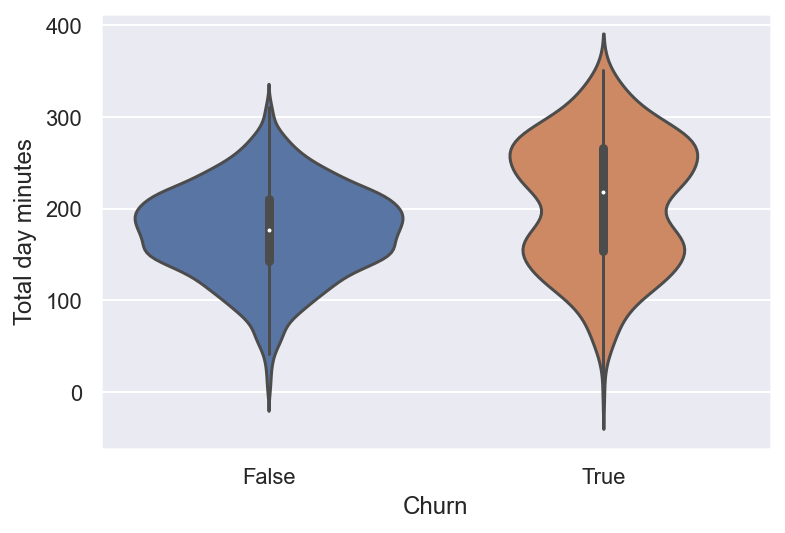

In [29]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [32]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

# Dimensionality reduction. t-SNE

In [33]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [34]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

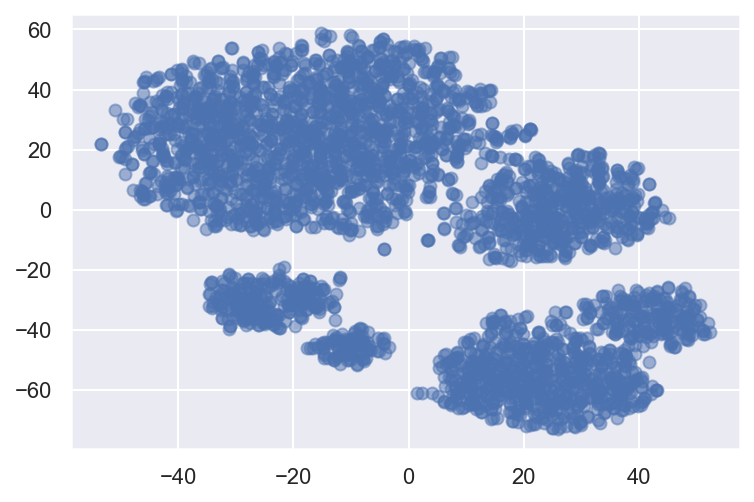

In [41]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

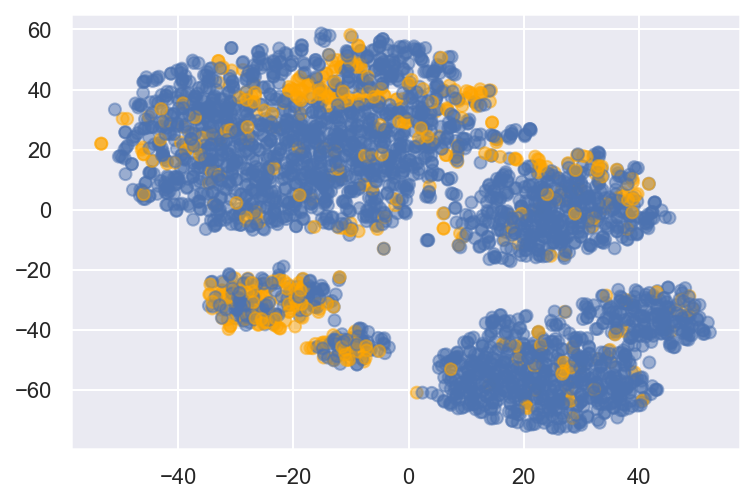

In [60]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5,
            c=df['Churn'].map({False: 'b', True: 'orange'}));



To better understand the picture, we can also color it with the remaining binary features: International Plan and Voicemail. Orange dots here indicate instances that are positive for the corresponding binary feature.


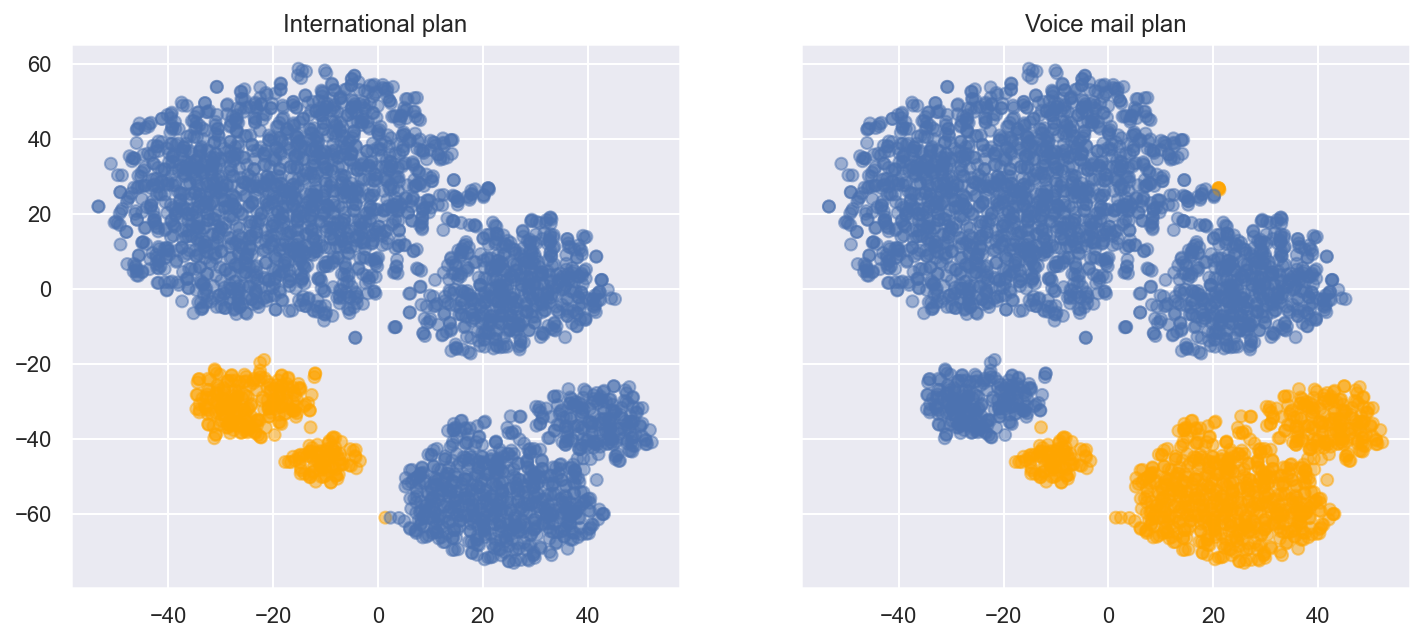

In [62]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'b'}), alpha=.5);
    axes[i].set_title(name);

#  ООП в Python

In [13]:
import time

def testTime(fn):
    def wrapper(*args):
        st = time.time()
        res = fn(*args)
        dt = time.time() - st
        print(f'Время выполнения функции {dt} сек')
        return res
    return wrapper

@testTime
def getEven(n):
    res = []
    for i in range(0, n + 1, 2):
        res.append(i)
    return res

@testTime
def getEvenCo(n):
    return [i for i in range(0, n + 1, 2)]

#t1 = testTime(getEvenCo)
getEven(21)

Время выполнения функции 0.0 сек


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [43]:
def memorize(fn):
    memo = {}
    def wrapper(*args):
        n = args[0]
        if n not in memo:
            print('вычисляем...')
            memo[n] = fn(*args)
        return memo[n]
    return wrapper

@memorize
def detSqr(n):
    return n ** 2

In [45]:
detSqr(12)

144